In [15]:
import nltk
import pandas as pd

In [16]:
import spacy

In [18]:
import spacy
from spacy.lang.en.examples import sentences

In [ ]:
# commands for reference
# python -m spacy convert --help

download a spacy model
# python -m spacy download model --direct --sdist pip_args
To get info on a pipeline
# !python -m spacy info --markdown --silent --exclude
!python -m spacy info en_core_web_sm --markdown

#Completing the config
python -m spacy init fill-config base_config.cfg config.cfg

#To convert a config file to spacy file
python -m spacy convert input_file output_dir --converter --file-type --n-sents --seg-sents --base --morphology --merge-subtokens --ner-map --lang


# Training the model - config contains all the model details
python -m spacy train config.cfg --output ./output --paths.train ./train --paths.dev ./dev




# Evaluate

# Best Model

#


In [98]:
# !python -m spacy info --markdown --silent --exclude
!python -m spacy info en_core_web_sm --markdown


## Info about pipeline 'en_core_web_sm'

- **lang:** en
- **name:** core_web_sm
- **version:** 3.7.1
- **description:** English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.
- **author:** Explosion
- **email:** contact@explosion.ai
- **url:** https://explosion.ai
- **license:** MIT
- **spacy_version:** >=3.7.2,<3.8.0
- **spacy_git_version:** bd2c17e20
- **vectors:** {'width': 0, 'vectors': 0, 'keys': 0, 'name': None}
- **pipeline:** ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
- **components:** ['tok2vec', 'tagger', 'parser', 'senter', 'attribute_ruler', 'lemmatizer', 'ner']
- **disabled:** ['senter']
- **sources:** [{'name': 'OntoNotes 5', 'url': 'https://catalog.ldc.upenn.edu/LDC2013T19', 'license': 'commercial (licensed by Explosion)', 'author': 'Ralph Weischedel, Martha Palmer, Mitchell Marcus, Eduard Hovy, Sameer Pradhan, Lance Ramshaw, Nianwen Xue, Ann Taylor, Jeff Kaufman, Michelle Franchini

In [19]:
sentences

['Apple is looking at buying U.K. startup for $1 billion',
 'Autonomous cars shift insurance liability toward manufacturers',
 'San Francisco considers banning sidewalk delivery robots',
 'London is a big city in the United Kingdom.',
 'Where are you?',
 'Who is the president of France?',
 'What is the capital of the United States?',
 'When was Barack Obama born?']

### Step-2 getting token , POS tagging , dependency parsing, vocab

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [18]:
nlp.vocab

In [20]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN dobj
startup NOUN dep
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


### Tokenization

In [61]:
#technique -1 using tokenier of pre-trained model
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Autonomous cars shift insurance liability toward manufacturers")
for token in doc:
    print(token.text, token.dep_, token.head.text, token.head.pos_,
            [child for child in token.children])

Autonomous amod cars NOUN []
cars nsubj shift VERB [Autonomous]
shift ROOT shift VERB [cars, liability, toward]
insurance compound liability NOUN []
liability dobj shift VERB [insurance]
toward prep shift VERB [manufacturers]
manufacturers pobj toward ADP []


In [18]:
data_df = pd.read_csv('C:/Users/00147515/Downloads/enhanced_data_nov_test_results_with_predsid.csv')

In [19]:
data_df["V_BIOGRAPHY"].nunique()

3310

In [20]:
data_df.drop_duplicates(subset="V_BIOGRAPHY",inplace=True)
df_sub=data_df.loc[:4,"V_BIOGRAPHY"]

In [32]:
import numpy as np

In [51]:
df_sub[0]

'[BIOGRAPHY] Militant {Operations} of Jamatul Ansar fil Hindal Sharqiya. [IDENTIFICATION] Abdul Latif (father). Resident of Langalkot upazila in Cumilla. [FUNDING] To be determined. [REPORTS] Feb 2023 - reportedly detained by Rapid Action Battalion (RAB) for involvement in terrorism-related activities.[NONCONVICTION TERROR CATEGORY NOTICE] This category includes information about individuals who are reportedly being investigated for, or have been arrested or charged on suspicion of, involvement in terrorism or terror related activities. The category also includes individuals or entities identified on national or internationally recognised banning, warning or wanted lists as allegedly connected to terrorism or individuals who are reportedly connected to an organisation included on any national or international terrorism list. Inclusion in this category does not mean that an individual or entity is a terrorist or terrorist organisation or that they are involved in or connected to terrori

In [ ]:
# def lemmatize(V_COMMENTS):
#     """Return V_COMMENTS after performing the lemmztiztion"""
#     doc = nlp(V_COMMENTS)
#     tokens = [token for token in doc]
#     return  " ".join([token.lemma_ for token in doc])

In [45]:
l=[]
l=np.array(nlp(df_sub[0]))

In [50]:
l

array([[, BIOGRAPHY, ], Militant, {, Operations, }, of, Jamatul, Ansar,
       fil, Hindal, Sharqiya, ., [, IDENTIFICATION, ], Abdul, Latif, (,
       father, ), ., Resident, of, Langalkot, upazila, in, Cumilla, ., [,
       FUNDING, ], To, be, determined, ., [, REPORTS, ], Feb, 2023, -,
       reportedly, detained, by, Rapid, Action, Battalion, (, RAB, ), for,
       involvement, in, terrorism, -, related, activities.[NONCONVICTION,
       TERROR, CATEGORY, NOTICE, ], This, category, includes, information,
       about, individuals, who, are, reportedly, being, investigated, for,
       ,, or, have, been, arrested, or, charged, on, suspicion, of, ,,
       involvement, in, terrorism, or, terror, related, activities, .,
       The, category, also, includes, individuals, or, entities,
       identified, on, national, or, internationally, recognised, banning,
       ,, warning, or, wanted, lists, as, allegedly, connected, to,
       terrorism, or, individuals, who, are, reportedly, conne

In [58]:
df_sub[4]

'INIRDAI;[BIOGRAPHY] Insurance Agent of Kotak Mahindra Old Mutual Life Insurance Limited. [IDENTIFICATION] Insurance Agents License Code: OKM60306626. Permanent Account No: DTPPS7072M. [REPORTS] Jul 2015 - registration to operate as an insurance agent suspended by the Insurance Regulatory and Development Authority (IRDA). Nov 2021 - no further information reported.'

In [55]:
df=pd.DataFrame({},columns=["Tokens","sent"])
for i,j in enumerate(df_sub):
    token=np.array(nlp(j))
    df_1=pd.DataFrame({"Tokens":token})
    df_1.loc[:,"Sent"]=i+1 
    df_1=df_1[["Sent","Tokens"]]

In [56]:
df_1

,Sent,Tokens
0,4,INIRDAI;[BIOGRAPHY
1,4,]
2,4,Insurance
3,4,Agent
4,4,of
...,...,...
56,4,no
57,4,further
58,4,information
59,4,reported


In [102]:
#technique -2 for tokeinization, Create a blank Tokenizer with just the English vocab
# Create a blank Tokenizer with just the English vocab
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

tokenizer = Tokenizer(nlp.vocab)

# Construction 2
# Create a Tokenizer with the default settings for English
from spacy.lang.en import English
nlp = English()

# including punctuation rules and exceptions
tokenizer = nlp.tokenizer

In [8]:
# nltk tokenize
text="I love myself"
nltk.tokenize.sent_tokenize(text, language='english')


['I love myself']

#### Exceptional handling in tokens

### Vocab

In [68]:
#Creating your own vocabulary
from spacy.vocab import Vocab
vocab = Vocab(strings=["hello", "world"])

In [79]:
vocab[0]

In [73]:
### Using an existing vocabulary

In [74]:
nlp=spacy.load("en_core_web_sm")

In [75]:
len(nlp.vocab)

764

In [78]:
nlp.vocab[0]

### Doc

In [87]:
# Construction 1 - creating your own doc
doc = nlp("Some text")

# Construction 2 - importing a doc 
from spacy.tokens import Doc

words = ["hello", "world", "!"]
spaces = [True, False, False]
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc)

hello world!


## NER practice

### Config creation

In [23]:
# config creation
!python -m spacy init fill-config config.cfg config_trial_temp_2.cfg

[+] Auto-filled config with all values
[+] Saved config
config_trial_temp_2.cfg
You can now add your data and train your pipeline:
python -m spacy train config_trial_temp_2.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


### Training data generation

#### Approach -1

In [29]:
from spacy.tokens import DocBin
from tqdm import tqdm
from spacy.util import filter_spans


In [31]:
training_data=({'text': 'Schedule a calendar event in Teak oaks HOA about competitions happening tomorrow', 'entities': [(0, 8, 'ACTION'), (11, 25, 'DOMAIN'), (29, 42, 'HOA'), (49, 71, 'EVENT'), (72, 80, 'DATE')]}
,{'text': 'Schedule a calendar event in Teak oaks HOA about competitions happening tomorrows', 'entities': [(1, 8, 'ACTION'), (11, 25, 'DOMAIN'), (29, 42, 'HOA'), (49, 71, 'EVENT'), (72, 80, 'DATE')]}
)
doc_bin = DocBin()
for training_example in tqdm(training_data):
    text = training_example['text']
    labels = training_example['entities']
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in labels: 
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents
    doc_bin.add(doc)

doc_bin.to_disk("train5.spacy")

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

Skipping entity
Skipping entity


#### Approach -2

In [ ]:
#To convert a config file to spacy file
#python -m spacy convert input_file output_dir --converter --file-type --n-sents --seg-sents --base --morphology --merge-subtokens --ner-map --lang


In [27]:
!python -m spacy convert train1.iob ./prod_data_ner/diff_split  --converter ner 

[i] Auto-detected token-per-line NER format
[!] Document delimiters found, automatic document segmentation with
`-n` disabled.
[+] Generated output file (74 documents):
prod_data_ner\diff_split\train1.spacy


In [ ]:
# .spacy format for all 3 datasets

In [ ]:
# to spacy format 
!python -m spacy convert --converter ner train1 ./prod_data_ner/diff_split
!python -m spacy convert --converter ner prod_data_ner/diff_split/test ./prod_data_ner/diff_split
!python -m spacy convert --converter ner prod_data_ner/diff_split/val ./prod_data_ner/diff_split

In [ ]:
python -m spacy train config.cfg --output ./output --paths.train ./train --paths.dev ./dev

### Training 

In [46]:
#TRAINING - downloaded config from Anjali source
 
%time
!python -m spacy train Downloaded_config.cfg --output prod_data_ner/output_from_downloaded_config --paths.train train.spacy --paths.dev val.spacy --training.logger.output_file prod_data_ner/red_pat_lg2/training_logs_1.jsonl 

Wall time: 0 ns
[i] Saving to output directory:
prod_data_ner\output_from_downloaded_config
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Initial learn rate: 0.001
[!] Saving logs is disabled because
prod_data_ner\red_pat_lg2\training_logs_1.jsonl already exists.
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     17.02   11.78   11.47   12.10    0.12
200     200          0.00    538.52    9.73    8.63   11.15    0.10
400     400          0.00    221.69    9.97    8.53   12.00    0.10
600     600          0.00    215.54   10.13    8.83   11.89    0.10
800     800          0.00    207.15   10.39    9.35   11.68    0.10
1000    1000          0.00    210.95    8.78    8.05    9.66    0.09
120

In [45]:
#TRAINING - reduce patience for large #REMAINS TO BE TRAINED
%time
!python -m spacy train prod_data_ner/diff_split/config_n2.cfg --output prod_data_ner/red_pat_lg3 --verbose --paths.train prod_data_ner/diff_split/train1.spacy --paths.dev prod_data_ner/diff_split/val.spacy --training.logger.output_file prod_data_ner/red_pat_lg2/training_logs_1.jsonl

Wall time: 0 ns
[i] Saving to output directory: prod_data_ner\red_pat_lg3
[i] Using CPU

=========================== Initializing pipeline ===========================
[+] Initialized pipeline

============================= Training pipeline =============================
[i] Pipeline: ['tok2vec', 'ner']
[i] Frozen components: ['tok2vec']
[i] Initial learn rate: 0.001
[!] Saving logs is disabled because
prod_data_ner\red_pat_lg2\training_logs_1.jsonl already exists.
E    #       LOSS NER  ENTS_F  ENTS_P  ENTS_R  SPEED   SCORE 
---  ------  --------  ------  ------  ------  ------  ------
  0       0      8.71   10.67   13.27    8.92  10992.35    0.11
  0      10    176.35   17.46   29.40   12.42  11162.36    0.17
  0      20    124.15   23.94   45.54   16.24  11228.48    0.24
  0      30     91.02   30.21   53.66   21.02  11069.65    0.30
  1      40    166.99   38.42   53.30   30.04  11241.00    0.38
  1      50    159.70   45.81   56.26   38.64  11305.61    0.46
  1      60    104.20  

[2024-02-17 21:43:28,243] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev', 'training.logger.output_file']
[2024-02-17 21:43:29,037] [INFO] Set up nlp object from config
[2024-02-17 21:43:29,052] [DEBUG] Loading corpus from path: prod_data_ner\diff_split\val.spacy
[2024-02-17 21:43:29,052] [DEBUG] Loading corpus from path: prod_data_ner\diff_split\train1.spacy
[2024-02-17 21:43:29,052] [INFO] Pipeline: ['tok2vec', 'ner']
[2024-02-17 21:43:29,052] [INFO] Resuming training for: ['ner']
[2024-02-17 21:43:29,067] [INFO] Copying tokenizer from: en_core_web_sm
[2024-02-17 21:43:29,724] [INFO] Copying vocab from: en_core_web_sm
[2024-02-17 21:43:29,906] [INFO] Created vocabulary
[2024-02-17 21:43:29,907] [INFO] Finished initializing nlp object
[2024-02-17 21:43:29,907] [INFO] Initialized pipeline components: []
[2024-02-17 21:43:29,920] [DEBUG] Loading corpus from path: prod_data_ner\diff_split\val.spacy
[2024-02-17 21:43:29,921] [DEBUG] Loading corpus from path: prod_data_ner\d

In [50]:
import pandas as pd
#read and print training log
model1 = pd.read_json(path_or_buf='prod_data_ner/red_pat_lg2/training_logs_1.jsonl ', lines=True)

In [51]:
model1

,epoch,step,losses,scores,score
0,0,0,{'ner': 8.7054386639},"{'ents_f': 10.6666666667, 'ents_p': 13.2701421...",0.106667
1,0,10,{'ner': 176.3520761828},"{'ents_f': 17.4626865672, 'ents_p': 29.3969849...",0.174627
2,0,20,{'ner': 124.1489567916},"{'ents_f': 23.9436619718, 'ents_p': 45.5357142...",0.239437
3,0,30,{'ner': 91.018214139},"{'ents_f': 30.2059496568, 'ents_p': 53.6585365...",0.302059
4,1,40,{'ner': 166.9852223454},"{'ents_f': 38.4249830278, 'ents_p': 53.2956685...",0.384250
...,...,...,...,...,...
74,31,740,{'ner': 0.009436991},"{'ents_f': 74.9607945635, 'ents_p': 73.8414006...",0.749608
75,32,750,{'ner': 4.9830835843},"{'ents_f': 75.1178627554, 'ents_p': 74.1468459...",0.751179
76,32,760,{'ner': 7.8328e-06},"{'ents_f': 75.1178627554, 'ents_p': 74.1468459...",0.751179
77,33,770,{'ner': 3.7715857089},"{'ents_f': 75.0130958617, 'ents_p': 74.0434332...",0.750131


### end

# TRAINING

In [ ]:
#TRAINING - reduce patience for large #REMAINS TO BE TRAINED
%time
!python -m spacy train prod_data_ner/diff_split/config_n2.cfg --output prod_data_ner/red_pat_lg2 --verbose --paths.train prod_data_ner/diff_split/train1.spacy --paths.dev prod_data_ner/diff_split/val.spacy --training.logger.output_file prod_data_ner/red_pat_lg2/training_logs.jsonl

In [ ]:
!python -m spacy evaluate prod_data_ner/red_pat_lg2/model-best prod_data_ner/diff_split/test.spacy
#DES, ORG, IND, PEP, -- DOB, NAM, PEPFA, ADD, POB(1), NAT(1), PROF,  FATH,  ID,

!python -m spacy evaluate prod_data_ner/red_pat_lg2/model-best prod_data_ner/diff_split/train1.spacy

!python -m spacy evaluate prod_data_ner/red_pat_lg2/model-best prod_data_ner/diff_split/val.spacy



# MODEL PLOTS

In [49]:
import pandas as pd
#read and print training log
model1 = pd.read_json(path_or_buf='prod_data_ner/red_pat_lg2/training_logs.jsonl', lines=True)

ValueError: Expected object or value

In [8]:
#modifications to training log
model1['train_loss'] = model1['losses'].apply(lambda x: x['ner'])

def dic2sc(x):
    return(x.keys())
    #return([x['ents_f'], x['ents_p'], x['ents_r']])

sc_df = pd.DataFrame(model1['scores'].to_dict()).T

model1_up = pd.concat([model1,sc_df], axis=1)

up2 = model1_up.loc[model1_up.groupby("epoch")["step"].idxmax()]

print(model1_up['train_loss'].describe())

#print(model1_up, up2)

count    120.000000
mean      46.092446
std       44.765920
min        7.042416
25%       15.884373
50%       27.751777
75%       56.339439
max      200.679224
Name: train_loss, dtype: float64


Text(0.5, 1.0, 'plot 4 epoch vs socres for each step')

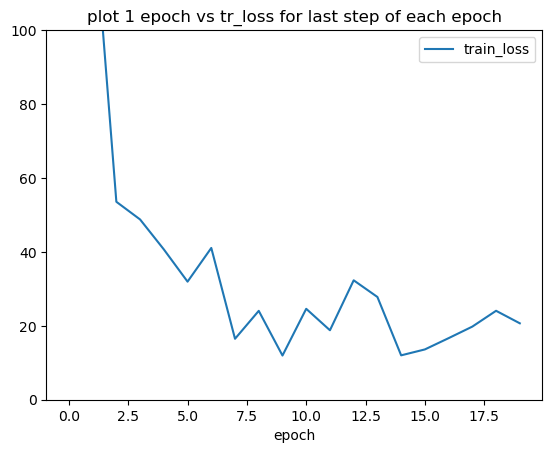

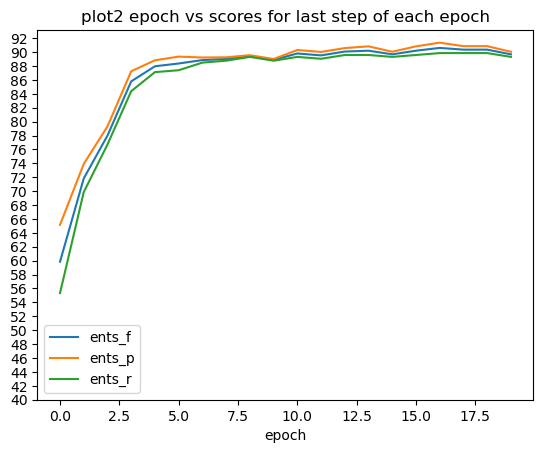

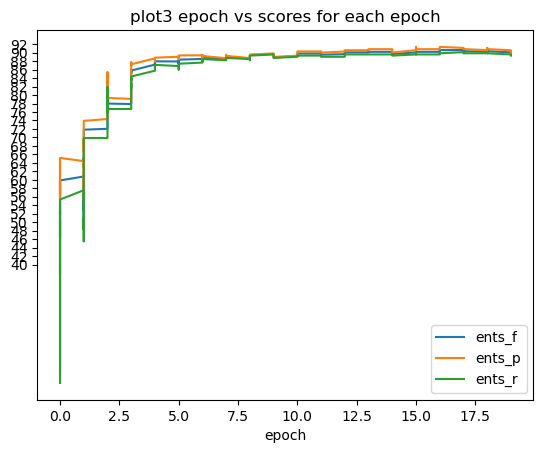

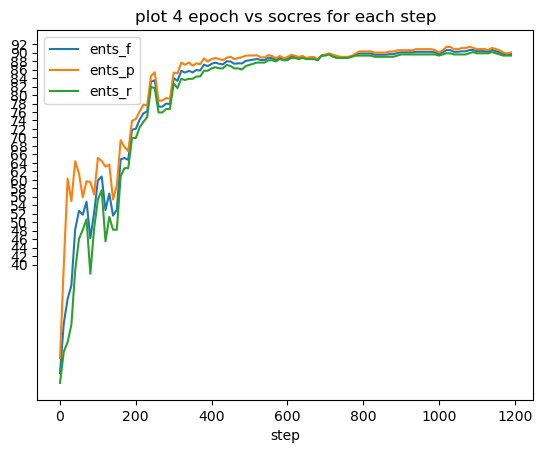

In [9]:
#'plot 1 epoch vs tr_loss for last step of each epoch'
up2[['epoch','train_loss']].set_index('epoch').plot()
plt.ylim(0,100)
plt.title('plot 1 epoch vs tr_loss for last step of each epoch')

#'plot2 epoch vs scores for last step of each epoch')
mx = round(up2[['ents_f','ents_p','ents_r']].max().max())-1
mn =  round(up2[['ents_f','ents_p','ents_r']].min().min())
up2[['epoch','ents_f','ents_p','ents_r']].set_index('epoch').plot()
plt.yticks(np.arange(40,94,2.0))
plt.title('plot2 epoch vs scores for last step of each epoch')

#print('plot3 epoch vs scores for each epoch')
model1_up[['epoch','ents_f','ents_p','ents_r']].set_index('epoch').plot()
plt.yticks(np.arange(40,94,2.0))
plt.title('plot3 epoch vs scores for each epoch')

#('plot 4 step vs socres for each step')
model1_up[['step','ents_f','ents_p','ents_r']].set_index(['step']).plot()
plt.yticks(np.arange(40,94,2.0))
plt.title('plot 4 epoch vs socres for each step')


# CONFUSION MATRIX

In [10]:
nlp1 = spacy.load('prod_data_ner/red_pat_lg2/model-best') #load the best model
#nlp = spacy.blank("en")

In [11]:
#load entire labelled dataset
mapped_set = pd.read_csv('fp_man_labelled/save_this_onemap.csv')

#modifications to labelled dataset
mapdata = mapped_set[['new_d','Tokens','Labels','bef_rep']].rename(columns = {'new_d':'Sentences'})

def sentpred(x):
    tok = []
    pred = []
    dcc = nlp1(x)
    for i in dcc:
      tok.append(i)
      if i.ent_iob_!='O':
            pred.append(str(i.ent_iob_+'-'+i.ent_type_))
      else:
        pred.append(i.ent_iob_)
    return ([pred,tok])    

cons_mapd = mapdata[mapdata.duplicated('Sentences')==False]

#getting predictions for entire labelled dataset
cons_mapd[['pred','tok']] = cons_mapd.apply(lambda x: sentpred(x['bef_rep']), axis=1, result_type='expand')


C:\Users\80006720\AppData\Local\Temp\1\ipykernel_30832\3392376734.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_mapd[['pred','tok']] = cons_mapd.apply(lambda x: sentpred(x['bef_rep']), axis=1, result_type='expand')
C:\Users\80006720\AppData\Local\Temp\1\ipykernel_30832\3392376734.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_mapd[['pred','tok']] = cons_mapd.apply(lambda x: sentpred(x['bef_rep']), axis=1, result_type='expand')


In [12]:
#modifications to prediction dataset by adding actual label dataset

temp_df =mapdata.groupby('Sentences').apply(lambda x: [i for i in x['Tokens']]).reset_index()
temp_cons_mapd = pd.merge(temp_df,cons_mapd, left_on = 'Sentences', right_on = 'Sentences').rename(columns = {0:'actual_tok'})
temp2 = mapdata.groupby('Sentences').apply(lambda x: [i for i in x['Labels']]).reset_index()
temp_cons_mapd2 = pd.merge(temp2,temp_cons_mapd, left_on = 'Sentences', right_on = 'Sentences').rename(columns = {0:'actual_lab'})
fin_d =temp_cons_mapd2.drop(columns = ['Tokens','Labels'])

In [13]:
test_df = pd.read_csv('./prod_data_ner/diff_split/test.csv')
data_df = pd.read_csv('prod_data_ner/save_this_one.csv')
val_df = pd.read_csv('./prod_data_ner/diff_split/val.csv')
train_df = pd.read_csv('./prod_data_ner/diff_split/train1.csv')

data_df.drop('Sentences', axis=1, inplace=True)
data_df.rename(columns ={'new_d':'Sentences'}, inplace=True)
data_df


,Unnamed: 0.1,index,Unnamed: 0,Tokens,Labels,Sentences
0,0,0,0,[,O,sentence0
1,1,1,1,BIOGRAPHY,O,sentence0
2,2,2,2,],O,sentence0
3,3,3,3,Director,B-DES,sentence0
4,4,4,4,of,O,sentence0
...,...,...,...,...,...,...
15657,15657,15657,32925,),O,sentence354
15658,15658,15658,32926,(,O,sentence354
15659,15659,15659,32927,deceased,O,sentence354
15660,15660,15660,32928,),O,sentence354


In [14]:
#FOR TEST CONFUSION MATRIX

test_df['Sent'] = test_df['Sentences'].apply(lambda x: x[:8]+' '+x[8:])

#test_df.drop(columns =['Unnamed: 0.1','index','Unnamed: 0'], inplace=True)

test_sents = test_df[test_df.duplicated('Sent')==False]['Sent']

#final merged test pred and actual dataset
y_p = pd.merge(fin_d,test_sents, left_on='Sentences',right_on ='Sent')

print(y_p)

y_p_n = y_p.drop(37)

#turning into required labels
y_act = y_p_n['actual_lab'].explode()
y_pred = y_p_n['pred'].explode()

l_all = sorted(data_df['Labels'].unique().tolist())

cm = confusion_matrix(y_act, y_pred, labels= l_all)

print('classification report')
print(classification_report(y_act, y_pred))

print('confusion matrix')
cm = confusion_matrix(y_act, y_pred, labels=l_all)
#fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=l_all)
disp.plot()
fig = disp.figure_
fig.set_figwidth(30)
fig.set_figheight(15) 
fig.suptitle('Plot of confusion matrix')


print('test_df label count',test_df['Labels'].value_counts())

In [163]:
lab_l =['B-DES','I-DES','B-IND','I-IND','B-ID','I-ID','B-ORG','I-ORG','B-PEP','I-PEP','O']

print(classification_report(y_act, y_pred, labels=lab_l))

              precision    recall  f1-score   support

       B-DES       0.96      0.91      0.93        55
       I-DES       0.99      0.97      0.98        88
       B-IND       0.97      0.91      0.94        32
       I-IND       0.96      0.90      0.93        59
        B-ID       1.00      0.86      0.92         7
        I-ID       1.00      1.00      1.00        19
       B-ORG       0.96      0.96      0.96        55
       I-ORG       0.97      0.98      0.97       130
       B-PEP       0.81      0.91      0.86        23
       I-PEP       0.81      0.93      0.87        46
           O       0.99      0.99      0.99      1545

   micro avg       0.98      0.98      0.98      2059
   macro avg       0.95      0.94      0.94      2059
weighted avg       0.98      0.98      0.98      2059



In [164]:
#train_df['Sent'].nunique()

classification report
              precision    recall  f1-score   support

       B-ADD       1.00      1.00      1.00         2
       B-DES       0.97      0.96      0.97       237
       B-DOB       1.00      0.94      0.97        16
      B-FATH       0.88      0.78      0.82         9
        B-ID       0.97      0.97      0.97        31
       B-IND       0.99      0.98      0.98        82
       B-NAM       1.00      1.00      1.00         6
       B-NAT       0.67      1.00      0.80         2
       B-ORG       0.97      0.97      0.97       243
       B-PEP       0.94      0.99      0.96        68
     B-PEPFA       1.00      0.50      0.67         2
       B-POB       1.00      1.00      1.00         1
      B-PROF       0.81      0.93      0.87        28
       I-ADD       1.00      1.00      1.00        11
       I-DES       0.98      0.97      0.98       359
       I-DOB       1.00      1.00      1.00        49
      I-FATH       0.64      0.90      0.75        10
     

C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O          5769
I-ORG       633
I-DES       359
B-ORG       243
B-DES       237
I-IND       165
I-PEP       110
I-ID         83
B-IND        82
B-PEP        68
I-DOB        49
B-ID         31
B-PROF       28
I-PROF       20
B-DOB        16
I-NAM        14
I-ADD        11
I-FATH       10
B-FATH        9
B-NAM         6
I-PEP         3
B-ADD         2
B-NAT         2
B-PEPFA       2
I-PEPFA       2
B-POB         1
Name: Labels, dtype: int64

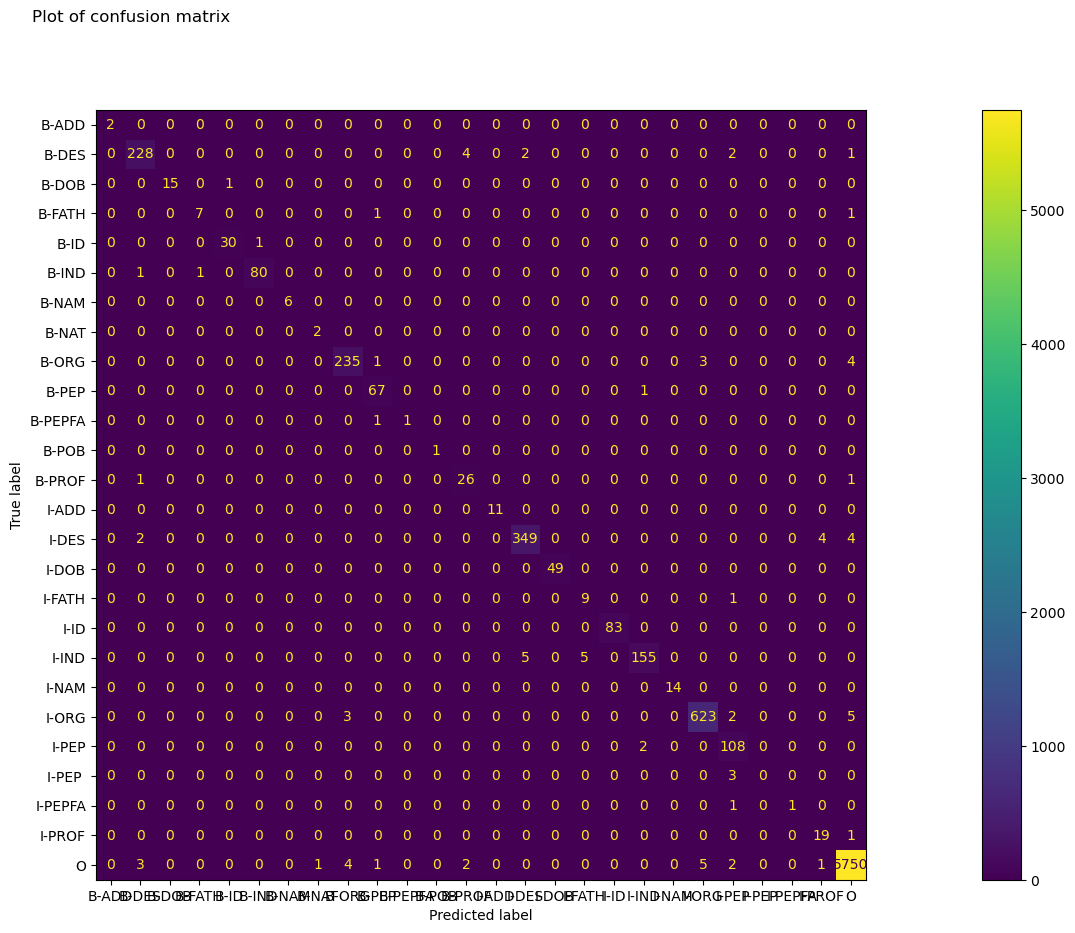

In [168]:
#train
train_df = pd.read_csv('./prod_data_ner/diff_split/train1_sm.csv')

train_df['Sent'] = train_df['Sentences'].apply(lambda x: x[:8]+' '+x[8:])

train_sents = train_df[train_df.duplicated('Sent')==False]['Sent']

train_yp = pd.merge(train_sents,fin_d,right_on='Sentences',left_on ='Sent')
train_yp['len_pred'] = train_yp['pred'].str.len()
train_yp['len_act'] = train_yp['actual_lab'].str.len()


y_trainact = train_yp['actual_lab'].explode()
y_trainpred = train_yp['pred'].explode()

cm = confusion_matrix(y_trainact, y_trainpred, labels = l_all)

from sklearn.metrics import classification_report

print('classification report')
print(classification_report(y_trainact, y_trainpred))
print('confusion matrix')
cm = confusion_matrix(y_trainact, y_trainpred, labels=l_all)
#fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=l_all)
disp.plot()
fig = disp.figure_
fig.set_figwidth(30)
fig.set_figheight(10) 
fig.suptitle('Plot of confusion matrix')


train_df['Labels'].value_counts()



In [169]:
lab_l =['B-DES','I-DES','B-IND','I-IND','B-ID','I-ID','B-ORG','I-ORG','B-PEP','I-PEP','O']

print(classification_report(y_trainact, y_trainpred, labels=lab_l))

              precision    recall  f1-score   support

       B-DES       0.97      0.96      0.97       237
       I-DES       0.98      0.97      0.98       359
       B-IND       0.99      0.98      0.98        82
       I-IND       0.98      0.94      0.96       165
        B-ID       0.97      0.97      0.97        31
        I-ID       1.00      1.00      1.00        83
       B-ORG       0.97      0.97      0.97       243
       I-ORG       0.99      0.98      0.99       633
       B-PEP       0.94      0.99      0.96        68
       I-PEP       0.91      0.98      0.94       110
           O       1.00      1.00      1.00      5769

   micro avg       0.99      0.99      0.99      7780
   macro avg       0.97      0.98      0.97      7780
weighted avg       0.99      0.99      0.99      7780



classification report
              precision    recall  f1-score   support

       B-DES       0.97      0.93      0.95       125
       B-DOB       1.00      1.00      1.00         3
      B-FATH       0.50      0.20      0.29         5
        B-ID       1.00      0.86      0.92        14
       B-IND       0.93      0.87      0.90        47
       B-NAT       1.00      1.00      1.00         1
       B-ORG       0.94      0.94      0.94       124
       B-PEP       0.88      0.97      0.92        36
      B-PROF       0.47      0.88      0.61         8
       I-DES       0.96      0.95      0.96       195
       I-DOB       1.00      1.00      1.00        11
      I-FATH       0.50      0.25      0.33         4
        I-ID       1.00      1.00      1.00        40
       I-IND       0.93      0.84      0.88        82
       I-ORG       0.98      0.96      0.97       322
       I-PEP       0.82      0.96      0.89        57
      I-PEP        0.00      0.00      0.00         1
     

C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\80006720\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


O         2805
I-ORG      322
I-DES      195
B-DES      125
B-ORG      124
I-IND       82
I-PEP       57
B-IND       47
I-ID        40
B-PEP       36
B-ID        14
I-DOB       11
B-PROF       8
B-FATH       5
I-FATH       4
B-DOB        3
I-PROF       2
B-NAT        1
I-PEP        1
Name: Labels, dtype: int64

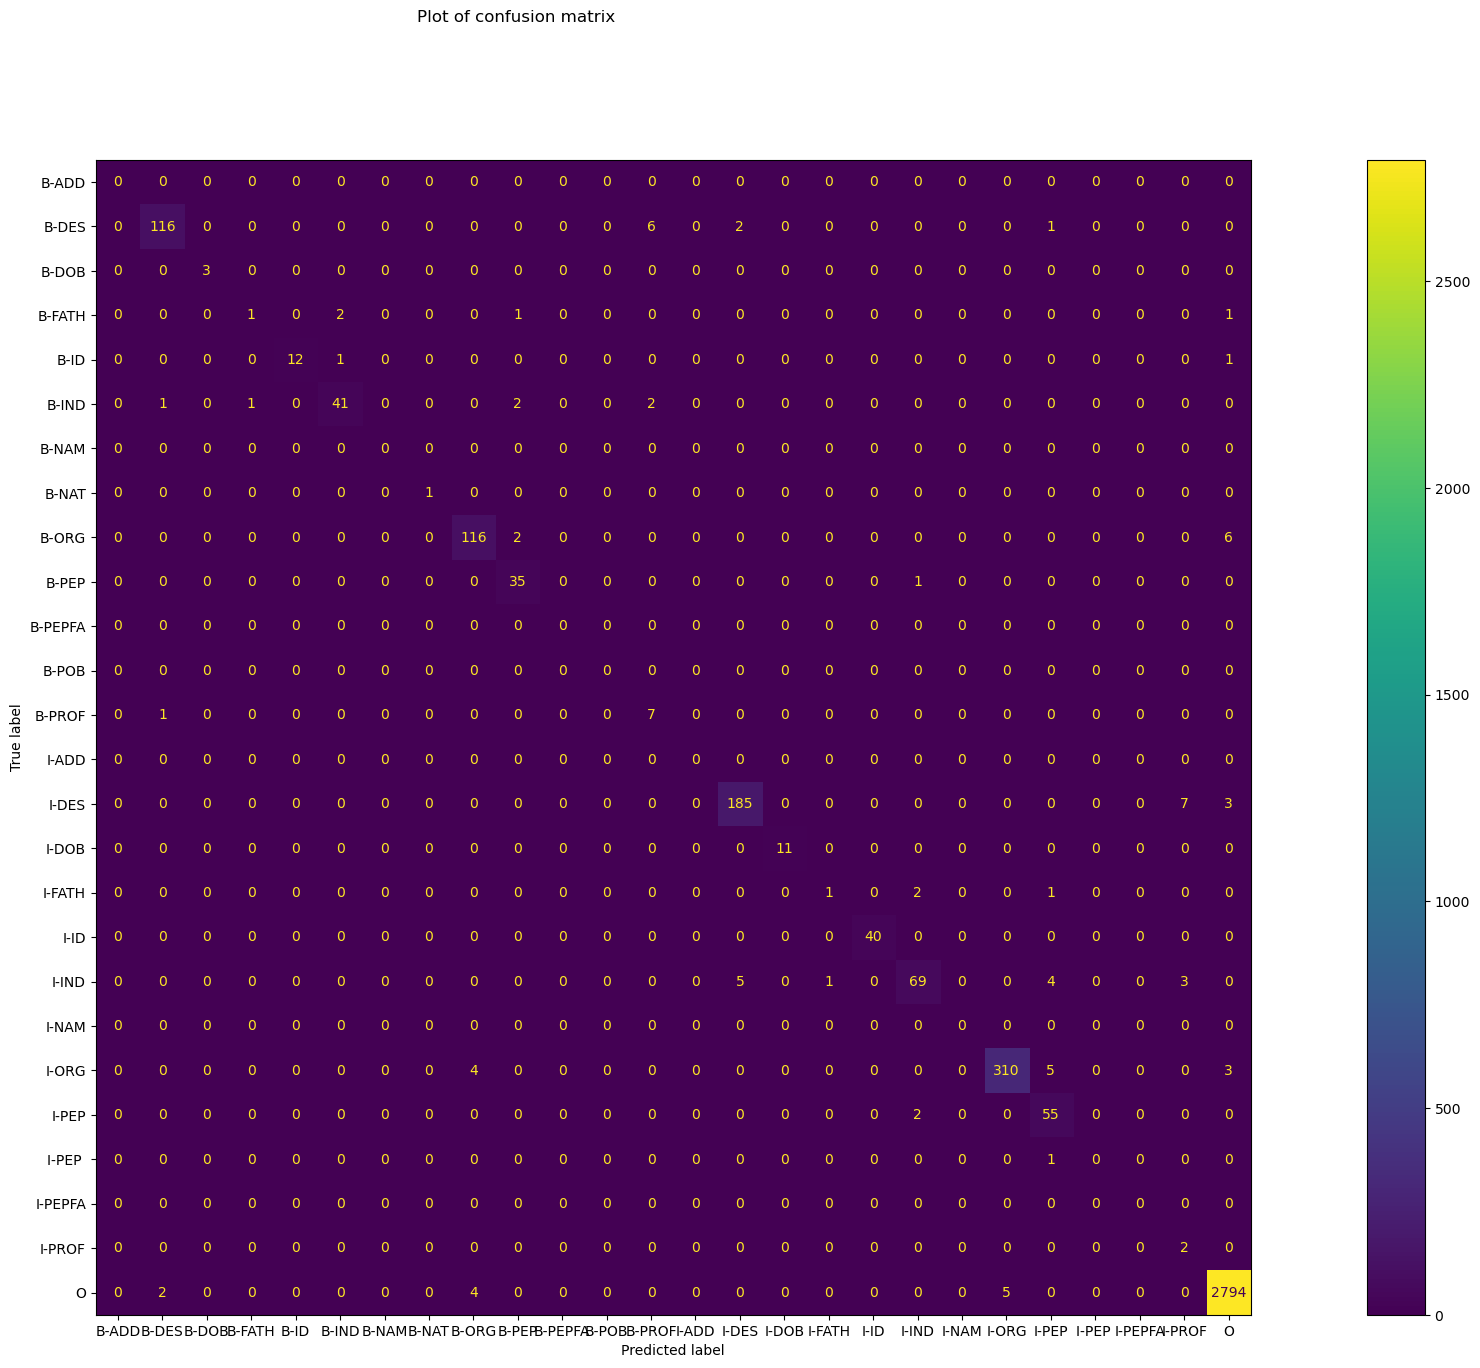

In [167]:
#val

val_df['Sent'] = val_df['Sentences'].apply(lambda x: x[:8]+' '+x[8:])

#test_sents = test_df[test_df.duplicated('Sent')==False]['Sent']
val_sents = val_df[val_df.duplicated('Sent')==False]['Sent']

val_yp = pd.merge(val_sents,fin_d,right_on='Sentences',left_on ='Sent')
val_yp['len_pred'] = val_yp['pred'].str.len()
val_yp['len_act'] = val_yp['actual_lab'].str.len()


y_valact = val_yp['actual_lab'].explode()
y_valpred = val_yp['pred'].explode()

cm = confusion_matrix(y_valact, y_valpred, labels = l_all)

from sklearn.metrics import classification_report

print('classification report')
print(classification_report(y_valact, y_valpred))
print('confusion matrix')
cm = confusion_matrix(y_valact, y_valpred, labels=l_all)
#fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=l_all)
disp.plot()
fig = disp.figure_
fig.set_figwidth(30)
fig.set_figheight(15) 
fig.suptitle('Plot of confusion matrix')


val_df['Labels'].value_counts()

